Dataset Preview:
  Transaction ID Customer ID       Date   Item Name     Category  Quantity  \
0          TX001     CUST005 2024-10-13        2-4D    Herbicide         9   
1          TX002     CUST002 2022-09-08  Accelegrow   Fertilizer         5   
2          TX003     CUST005 2021-02-28  Accelegrow   Fertilizer         3   
3          TX004     CUST005 2018-05-15   Frowncide  Insecticide         6   
4          TX005     CUST001 2017-08-05     Super M   Fertilizer         7   

   Unit Price (PHP)  Total (PHP)  
0               250         2250  
1               900         4500  
2               900         2700  
3               940         5640  
4               280         1960  

User-Item Matrix Preview:
Item Name    2-4D  Accelegrow  Frowncide  Super M
Customer ID                                      
CUST001        95         142        130      140
CUST002       165         108        128      109
CUST003       112         150        115      129
CUST004       101         1

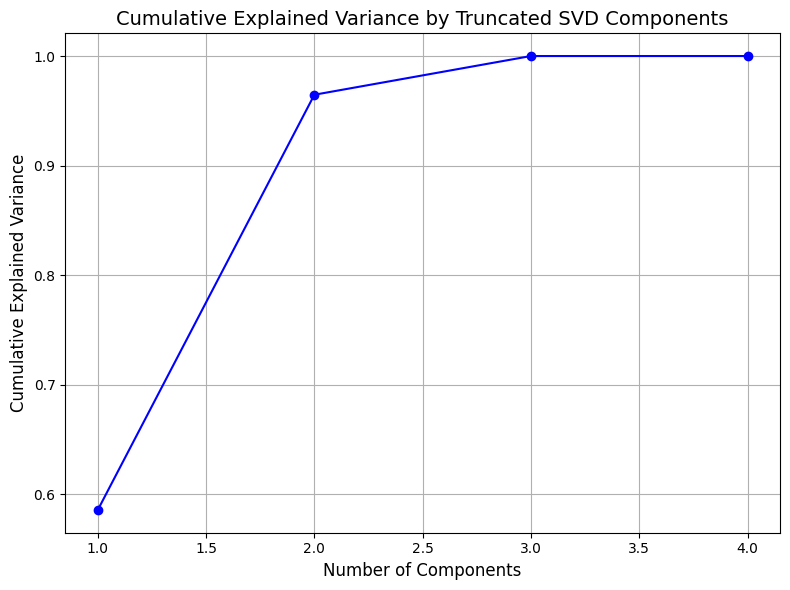


Product recommendation model saved successfully!


In [1]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
import joblib
import matplotlib.pyplot as plt

# Load your dataset
file_path = 'sales_data/extended_product_recommendation_dataset.xlsx'  # Adjust the file path
data = pd.read_excel(file_path)

# Display the first few rows to inspect the data
print("Dataset Preview:")
print(data.head())

# Create a user-item matrix for recommendations
data['Purchase Count'] = data['Quantity']
user_item_matrix = data.pivot_table(
    index='Customer ID', 
    columns='Item Name', 
    values='Purchase Count', 
    aggfunc='sum'
).fillna(0)

# Display the user-item matrix
print("\nUser-Item Matrix Preview:")
print(user_item_matrix.head())

# Normalize the matrix by subtracting the mean per user (customer)
user_item_matrix_norm = user_item_matrix.subtract(user_item_matrix.mean(axis=1), axis=0)

# Train the TruncatedSVD model for dimensionality reduction
n_components = 4  # Number of latent features to extract
model = TruncatedSVD(n_components=n_components, random_state=42)
model.fit(user_item_matrix_norm)

# Display explained variance ratio for the selected components
explained_variance = model.explained_variance_ratio_
print("\nExplained Variance Ratio by Components:")
for i, variance in enumerate(explained_variance, start=1):
    print(f"Component {i}: {variance:.4f}")

# Visualize the cumulative explained variance
cumulative_variance = explained_variance.cumsum()
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title("Cumulative Explained Variance by Truncated SVD Components", fontsize=14)
plt.xlabel("Number of Components", fontsize=12)
plt.ylabel("Cumulative Explained Variance", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the model and user-item matrix
joblib.dump(model, 'product_recommendationmodel.joblib')
joblib.dump(user_item_matrix, 'user_item_matrix.joblib')
print("\nProduct recommendation model saved successfully!")
